In [1]:
    import matplotlib.pyplot as plt
    import plotly
    import math
    import datetime
    from datetime import date
    from datetime import datetime
    import numpy as np
    from pandas_datareader import data as web


C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
# se end=0,end=hoje
def graphs(start,end,data1,nome1):
    
    if end==0:
        end=date.today()
        
    start3=start
        
########## dolar
    dolar=web.DataReader('USDBRL=X', 'yahoo', start, end)
    start=datetime.strptime(start, '%Y-%m-%d')
    start1=dolar.index[0]

    if start1 > start:
        start3=start1
    
############### coletando dados no yahoo
    
    d1 =web.DataReader(data1, 'yahoo', start3, end)
    
    data2="^DJI"
    nome2="Dow Jones"
    d2 =web.DataReader(data2, 'yahoo', start3, end)
    
################################## dias em comum

    dias = list(map(lambda ib: ib if ib in d1.index and ib in d2.index else 0 , dolar.index)) 
    dias=[x for x in dias if x != 0]

    
    d1=d1.loc[dias,:]
    d2=d2.loc[dias,:]
    dolar=dolar.loc[dias,:]
    
  #dolarizando indice brasileiro
    
    d1['Close']=list(map(lambda r ,d: r/d, d1['Close'],dolar['Close']))
    d1['Open']=list(map(lambda r ,d: r/d, d1['Open'],dolar['Open']))
    
    
    
    ################################### variação diária (ddx)
    
    od=dolar['Open']
    oc=dolar['Close']
    ddolar=list(map(lambda o,c: c/o,od,oc))
    
    o=d1['Open']
    c=d1['Close']
    dd1=list(map(lambda o,c,dd: (c/o-1)/dd*100,o,c,ddolar))
    o=d2['Open']
    c=d2['Close']
    dd2=list(map(lambda o,c: (c/o-1)*100,o,c))
    
    ### gráfico da variação diária
    
    x=d1.index
    plt.plot(x,dd1 , 'g-', alpha=.5)
    plt.plot(x,dd2 , 'b-', alpha=1)
    plt.legend([nome1,nome2])
    title=nome1 + " Dolarizado X DOW JONES"
    plt.title(title)
    plt.ylabel("Variação diária (%)")
    plt.show()
    a=round(np.corrcoef(dd1, dd2)[1][0],2)
    print("Correlação: ",a)

    
   ## gráfico do valor
    
    x=d1.index
    data1 = d1['Close']
    data2 = d2['Close']

    title=nome1 + " Dolarizado X DOW JONES"
    fig, ax1 = plt.subplots()
    plt.legend([nome1,nome2])
    plt.grid(color='black', linestyle='-', linewidth=.2)
    color = 'green'
    ax1.set_ylabel(nome1,color=color)
    ax1.plot(x, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'blue'
    ax2.set_ylabel(nome2, color=color)  # we already handled the x-label with ax1
    ax2.plot(x, data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.title(title)
    plt.show()
    a=round(np.corrcoef(d1['Close'], d2['Close'])[1][0],2)
    print("Correlação: ",a)
    ######### variação acumulada 
    
    d1acu=list(map(lambda d:100*(d/d1['Close'][0]-1),d1['Close']))
    d2acu=list(map(lambda d:100*(d/d2['Close'][0]-1),d2['Close']))
    

    
    ## gráfico da variação acumulada
    
    x=d1.index
    plt.ylabel("Variação acumulada (%)")
    plt.plot(x,d1acu , 'g-')
    plt.plot(x,d2acu , 'b-')
    plt.legend([nome1,nome2])
    plt.grid(color='black', linestyle='-', linewidth=.2)

    title=nome1 + " Dolarizado X DOW JONES"
    plt.title(title)
    plt.show()
    a=round(np.corrcoef(d1acu, d2acu)[1][0],2)
    print("Correlação: ",a)
    
 
    
    
    ##########
    x=d1.index
    y=list(map(lambda i,d:i-d,d1acu,d2acu))

    my_color=list(map(lambda x: 'blue' if x>=0  else 'red',y))
    plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
    plt.grid(color='black', linestyle='-', linewidth=.2)
    plt.scatter(x, y, color=my_color, s=1, alpha=1)    
    y='Diferença entre '+ nome1 + ' dolarizado e Dow JONES (%)'
    plt.ylabel(y)
    title=nome1 + " Dolarizado X DOW JONES"
    plt.title(title)


   

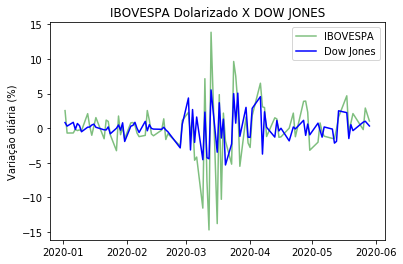

Correlação:  0.71


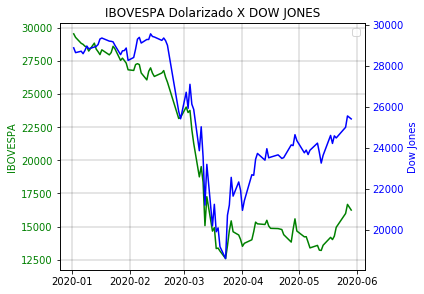

Correlação:  0.93


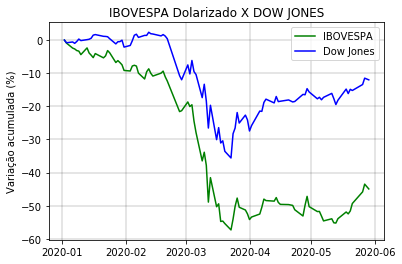

Correlação:  0.93


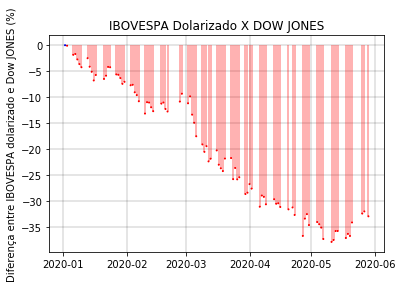

In [7]:
graphs("2020-01-01",0,"^BVSP","IBOVESPA")